In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister, transpile, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib as mpl

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum", token="c463eb3a1524dd933346849aed0b3d884b3ddc61eb9b51bb3d5e72fc187dc2000f09df38138222cde9284c2aea7a3b3a3d2694a96ef869e88ceccb898dd0b747")

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


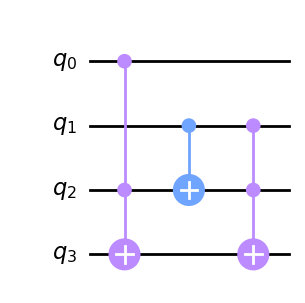

In [8]:
#creating the 4-qubit carry circuit and reverse circuit for carrying operations for the adder

carry_circuit = QuantumCircuit(4, name = "CARRY")
carry_circuit.ccx(1,2,3)
carry_circuit.cx(1,2)
carry_circuit.ccx(0,2,3)
carry_gate = carry_circuit.to_gate()

reverse_carry_circuit = carry_circuit.inverse()
reverse_carry_gate = reverse_carry_circuit.to_gate()

#carry_circuit.draw("mpl")
reverse_carry_circuit.draw("mpl")

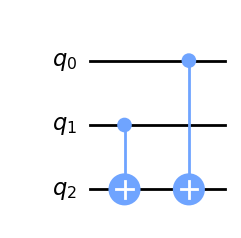

In [9]:
#creating the 3-qubit sum circuit for summing the bits and storing bitwise outputs for adder

sum_circuit = QuantumCircuit(3, name = "SUM")
sum_circuit.cx(1,2)
sum_circuit.cx(0,2)
sum_gate = sum_circuit.to_gate()

sum_circuit.draw("mpl")

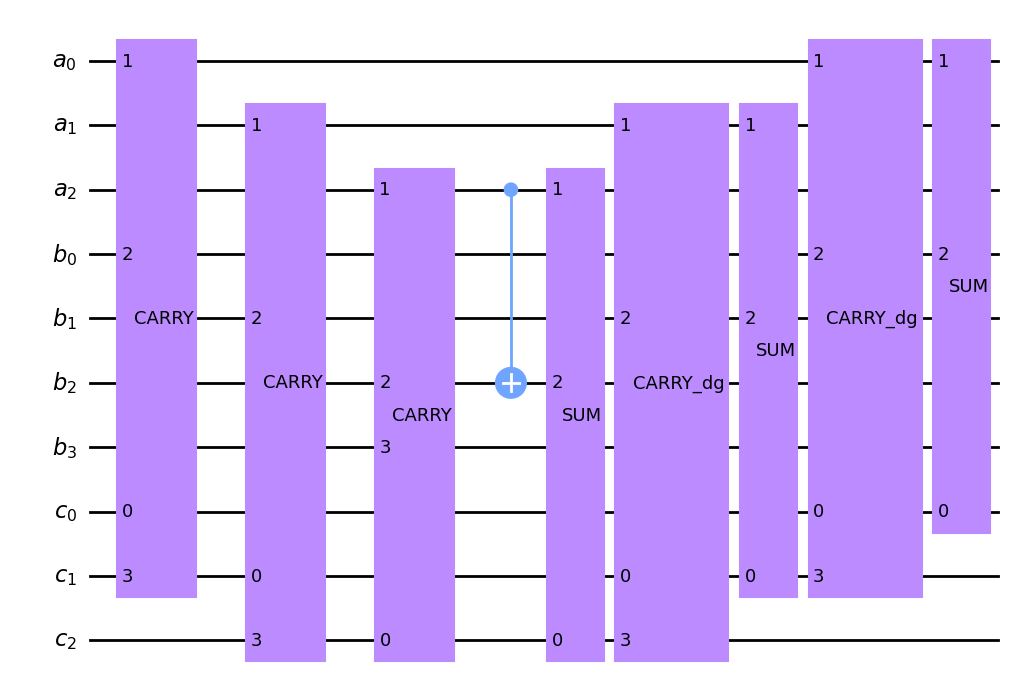

In [11]:
#creating the plain adder circuit with three quantum registers
#here qr_a is the register for the first value a, with n qubits
#qr_b is the register for the second value b, with n+1 qubits, and it stores the value a+b in the end
#qr_c is the ancilla register for storing carries, and has n-1 qubits

#temporary: a,b are our values, encoded in n bits

qr_a = QuantumRegister(3, name='a')
qr_b = QuantumRegister(4, name='b')
qr_c = QuantumRegister(3, name='c')

adder_circuit = QuantumCircuit(qr_a, qr_b, qr_c, name = "ADDER")

n = qr_a.size

for i in range(1,n):
    adder_circuit.append(carry_gate, [qr_c[i-1], qr_a[i-1], qr_b[i-1], qr_c[i]])
    
adder_circuit.append(carry_gate, [qr_c[n-1], qr_a[n-1], qr_b[n-1], qr_b[n]])

adder_circuit.cx(qr_a[n-1], qr_b[n-1])

for i in range(n-1, 0, -1):
    adder_circuit.append(sum_gate, [qr_c[i], qr_a[i], qr_b[i]])
    adder_circuit.append(reverse_carry_gate, [qr_c[i-1], qr_a[i-1], qr_b[i-1], qr_c[i]])
    
adder_circuit.append(sum_gate, [qr_c[0], qr_a[0], qr_b[0]])
    
adder_gate = adder_circuit.to_gate()

reverse_adder_circuit = adder_circuit.inverse()
reverse_adder_gate = reverse_adder_circuit.to_gate()

adder_circuit.draw('mpl')



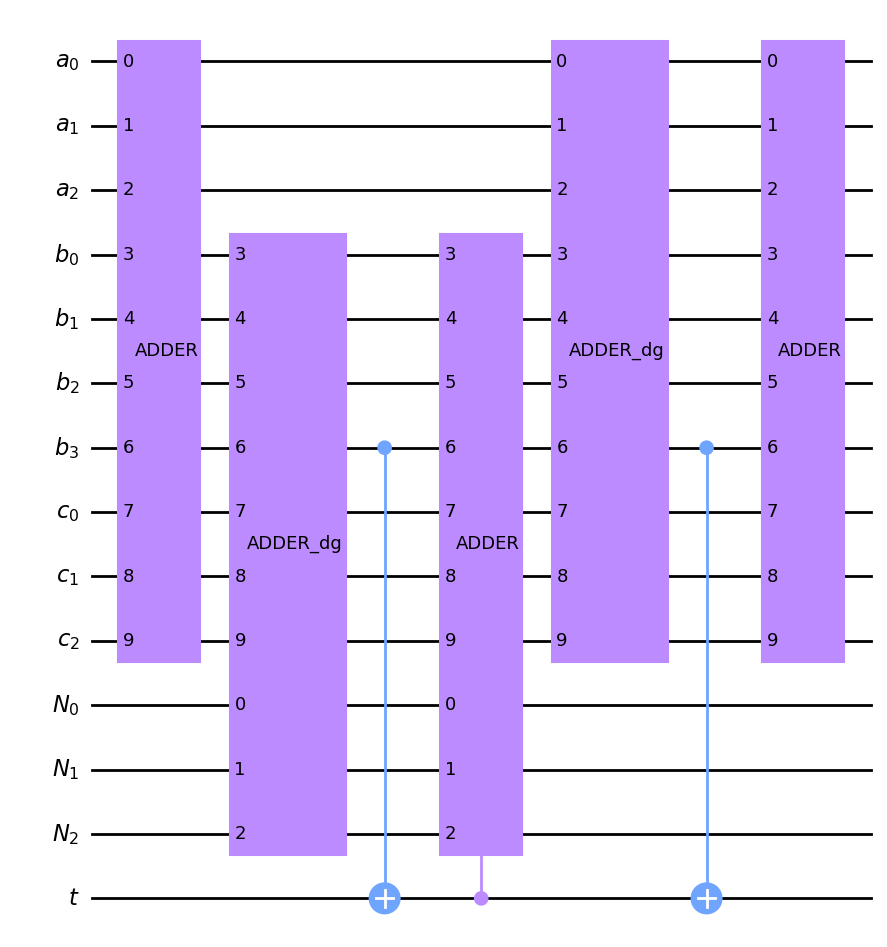

In [23]:
#creating the adder mod circuit with 4 quantum registers
#we want to compute a+b modulo N
#here a,b<=N, and all are encoded in bits
#qr_a and qr_b correspond to registers for a,b, and qr_N corresponds to N
#while qr_0 is a single qubit register initialised to state 0
#we also keep an ancilla register of size n-1, called qr_c for carries in the adder
#qr_a qr_N are n qubit, qr_b is n+1 qubit and qr_c is n-1 qubit

qr_N = QuantumRegister(3, name = "N")
qr_0 = QuantumRegister(1, name = "t")

adder_mod_circuit = QuantumCircuit(qr_a, qr_b, qr_c, qr_N, qr_0, name = "ADDER MOD")

n = qr_a.size

list_a = [qr_a[i] for i in range(n)]
list_b = [qr_b[i] for i in range(n+1)]
list_c = [qr_c[i] for i in range(n)]

adder_mod_circuit.append(adder_gate, list_a+list_b+list_c)


list_N = [qr_N[i] for i in range(n)]

adder_mod_circuit.append(reverse_adder_gate, list_N+list_b+list_c)

#adder_mod_circuit.x(qr_b[n])

adder_mod_circuit.cx(qr_b[n], qr_0[0])

#adder_mod_circuit.x(qr_b[n])

#making controlled adder gate
c_adder = adder_gate.control()

adder_mod_circuit.append(c_adder, [qr_0[0]]+list_N+list_b+list_c)

adder_mod_circuit.append(reverse_adder_gate, list_a+list_b+list_c)

adder_mod_circuit.cx(qr_b[n], qr_0[0])

adder_mod_circuit.append(adder_gate, list_a+list_b+list_c)


adder_mod_circuit.draw("mpl")

In [ ]:
#creating the modular multiplication circuit
#this is a controlled multiplication circuit
#we have registers blah blah 






In [ ]:
def ModExp(a,x,N): 
    
    #converting to binary strings
    
    str_a = str(bin(a))
    str_x = str(bin(x))
    
         
    
    
    

        
    
    